In [18]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [19]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])
        

In [20]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [21]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [22]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [24]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [26]:
response = requests.get(spacex_url)
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [27]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [28]:
response.status_code

200

In [29]:
import requests
import pandas as pd
import datetime

# SpaceX API'den veri almak için URL
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

# GET isteği ile veriyi alın
response = requests.get(static_json_url)

# Durum kodunu kontrol edin (200 ise başarılı)
if response.status_code == 200:
    print("Başarılı istek")

# JSON verisini DataFrame'e dönüştürme
data = pd.json_normalize(response.json())

# İlk 5 satırı görüntüleyin
print(data.head())

# Sadece ihtiyacınız olan sütunları seçin
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# Birden fazla çekirdeği veya yükü olan satırları çıkarın
data = data[data['cores'].map(len) == 1]
data = data[data['payloads'].map(len) == 1]

# Çekirdek ve yük listelerinin içindeki tek değerleri alın
data['cores'] = data['cores'].map(lambda x: x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])

# Tarihleri datetime tipine çevirin ve sadece tarihi alın
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Belirli bir tarihten önceki fırlatmaları seçin
data = data[data['date'] <= datetime.date(2020, 11, 13)]

# Global değişkenler
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

# Yardımcı Fonksiyonlar
def getBoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

def getLaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

def getPayloadData(data):
    for load in data['payloads']:
        if load:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response.get('mass_kg'))
            Orbit.append(response.get('orbit'))

def getCoreData(data):
    for core in data['cores']:
        if core['core'] != None:
            response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
            Block.append(response.get('block'))
            ReusedCount.append(response.get('reuse_count'))
            Serial.append(response.get('serial'))
        else:
            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)
        Outcome.append(str(core['landing_success']) + ' ' + str(core.get('landing_type')))
        Flights.append(core.get('flight'))
        GridFins.append(core.get('gridfins'))
        Reused.append(core.get('reused'))
        Legs.append(core.get('legs'))
        LandingPad.append(core.get('landpad'))

# API'den ek bilgileri almak için fonksiyonları çağırma
getBoosterVersion(data)
getLaunchSite(data)
getPayloadData(data)
getCoreData(data)

# Elde edilen verileri bir sözlüğe ekleme
launch_dict = {
    'FlightNumber': list(data['flight_number']),
    'Date': list(data['date']),
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

# Sözlükten bir Pandas DataFrame oluşturma
df = pd.DataFrame(launch_dict)

# DataFrame'in özet bilgisi
print(df.info())

# İlk 5 satırını görüntüleme
print(df.head())


Başarılı istek
       static_fire_date_utc  static_fire_date_unix    tbd    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False  False     0.0   
1                      None                    NaN  False  False     0.0   
2                      None                    NaN  False  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False  False     0.0   
4                      None                    NaN  False  False     0.0   

                     rocket  success  \
0  5e9d0d95eda69955f709d1eb    False   
1  5e9d0d95eda69955f709d1eb    False   
2  5e9d0d95eda69955f709d1eb    False   
3  5e9d0d95eda69955f709d1eb     True   
4  5e9d0d95eda69955f709d1eb     True   

                                                                                                                                                                                details  \
0                                                                                                   

In [30]:
# Falcon 1 fırlatmalarını çıkarmak için veri çerçevesini filtreleyin
data_falcon9 = df[df['BoosterVersion'] != 'Falcon 1']

# "FlightNumber" sütununu 1'den başlayarak yeniden numaralandırın
data_falcon9.loc[:, 'FlightNumber'] = list(range(1, data_falcon9.shape[0] + 1))

# Filtrelenmiş veri çerçevesini görüntüleyin
print(data_falcon9.head())

# Eksik değerleri kontrol edin
missing_values = data_falcon9.isnull().sum()
print("Eksik değerler:\n", missing_values)


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             1  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5             2  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6             3  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7             4  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8             5  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5         

In [31]:
import numpy as np

# "PayloadMass" sütununun ortalama değerini hesaplayın
payload_mass_mean = data_falcon9['PayloadMass'].mean()

# Hesaplanan ortalama ile eksik değerleri doldurun
data_falcon9['PayloadMass'].replace(np.nan, payload_mass_mean, inplace=True)

# "PayloadMass" sütunundaki eksik değerlerin sıfırlandığını kontrol edin
missing_values_after = data_falcon9.isnull().sum()
print("Eksik değerler:\n", missing_values_after)

# Temizlenmiş veri çerçevesini bir CSV dosyasına kaydedin
data_falcon9.to_csv('dataset_part_1.csv', index=False)


Eksik değerler:
 FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64


C:\Users\Aydan\AppData\Local\Temp\ipykernel_2176\3448892484.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_falcon9['PayloadMass'].replace(np.nan, payload_mass_mean, inplace=True)
C:\Users\Aydan\AppData\Local\Temp\ipykernel_2176\3448892484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass'].replace(np.nan, 

In [32]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

In [33]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [34]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [35]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [36]:
# LaunchSite sütunundaki her fırlatma bölgesindeki fırlatma sayısını hesaplayın
launch_site_counts = data_falcon9['LaunchSite'].value_counts()

# Sonuçları yazdırın
print(launch_site_counts)


LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [37]:
# Orbit sütunundaki yörüngelerin sayısını ve frekansını hesaplayın
orbit_counts = data_falcon9['Orbit'].value_counts()

# Sonuçları yazdırın
print(orbit_counts)


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


In [38]:
# Outcome sütunundaki iniş sonuçlarının sayısını ve frekansını hesaplayın
landing_outcomes = data_falcon9['Outcome'].value_counts()

# Sonuçları yazdırın
print(landing_outcomes)

# Başarısız iniş sonuçlarını bir sete ekleyin
bad_outcomes = set(landing_outcomes.keys()[[1, 3, 5, 6, 7]])

# Başarısız iniş sonuçlarını yazdırın
print(bad_outcomes)


Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64
{'None ASDS', 'None None', 'False ASDS', 'False Ocean', 'False RTLS'}


In [39]:
# İniş sonucu etiketini oluşturun
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in data_falcon9['Outcome']]

# Bu sınıflandırma değişkenini veri çerçevesine ekleyin
data_falcon9['Class'] = landing_class

# İlk birkaç satırı görüntüleyin
print(data_falcon9[['Class']].head(8))

# Başarı oranını hesaplayın
success_rate = data_falcon9["Class"].mean()
print("Başarı oranı:", success_rate)

# Temizlenmiş veri çerçevesini bir CSV dosyasına kaydedin
data_falcon9.to_csv("dataset_part_2.csv", index=False)


    Class
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      1
Başarı oranı: 0.6666666666666666


In [45]:
load_ext sql

In [46]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [47]:
%sql sqlite:///my_data1.db

In [61]:
unique_launch_sites = data_falcon9['LaunchSite'].unique()
print(unique_launch_sites)


['CCSFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


In [62]:
cca_records = data_falcon9[data_falcon9['LaunchSite'].str.startswith('CCA')].head(5)
print(cca_records)


Empty DataFrame
Columns: [FlightNumber, Date, BoosterVersion, PayloadMass, Orbit, LaunchSite, Outcome, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude, Class]
Index: []


In [63]:
# Task 3
total_payload_mass = data_falcon9['PayloadMass'].sum()
print("Total Payload Mass:", total_payload_mass)


Total Payload Mass: 551119.2882352942


In [64]:
avg_payload_mass_f9_v1_1 = data_falcon9[data_falcon9['BoosterVersion'] == 'F9 v1.1']['PayloadMass'].mean()
print(avg_payload_mass_f9_v1_1)


nan


In [65]:
first_successful_ground_pad_landing = data_falcon9[data_falcon9['Outcome'] == 'True RTLS']['Date'].min()
print(first_successful_ground_pad_landing)


2015-12-22


In [66]:
successful_boosters = data_falcon9[(data_falcon9['Outcome'] == 'True ASDS') & 
                                   (data_falcon9['PayloadMass'] > 4000) & 
                                   (data_falcon9['PayloadMass'] < 6000)]['BoosterVersion']
print(successful_boosters)


24    Falcon 9
27    Falcon 9
32    Falcon 9
43    Falcon 9
58    Falcon 9
73    Falcon 9
Name: BoosterVersion, dtype: object


In [67]:
mission_outcomes = data_falcon9['Outcome'].value_counts()
print(mission_outcomes)


Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [68]:
max_payload_mass = data_falcon9['PayloadMass'].max()
boosters_max_payload = data_falcon9[data_falcon9['PayloadMass'] == max_payload_mass]['BoosterVersion']
print(boosters_max_payload)


72    Falcon 9
75    Falcon 9
77    Falcon 9
78    Falcon 9
80    Falcon 9
81    Falcon 9
83    Falcon 9
84    Falcon 9
87    Falcon 9
89    Falcon 9
90    Falcon 9
91    Falcon 9
92    Falcon 9
Name: BoosterVersion, dtype: object


In [70]:
# Date sütununu dize formatına çevirin
data_falcon9['Date'] = data_falcon9['Date'].astype(str)

# 2015 yılına ait kayıtları ve False ASDS sonuçlarını filtreleyin
failures_2015 = data_falcon9[(data_falcon9['Date'].str.contains('2015')) & 
                             (data_falcon9['Outcome'] == 'False ASDS')]

# Ayları çıkartma işlemi
failures_2015['Month'] = failures_2015['Date'].apply(lambda x: x[5:7])

# Sonuçları görüntüleyin
print(failures_2015[['Month', 'Outcome', 'BoosterVersion', 'LaunchSite']])


   Month     Outcome BoosterVersion    LaunchSite
15    01  False ASDS       Falcon 9  CCSFS SLC 40
17    04  False ASDS       Falcon 9  CCSFS SLC 40


C:\Users\Aydan\AppData\Local\Temp\ipykernel_2176\3244276177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failures_2015['Month'] = failures_2015['Date'].apply(lambda x: x[5:7])


In [71]:
landing_outcomes_ranked = data_falcon9[(data_falcon9['Date'] >= '2010-06-04') & 
                                       (data_falcon9['Date'] <= '2017-03-20')]['Outcome'].value_counts().sort_values(ascending=False)
print(landing_outcomes_ranked)


Outcome
None None      9
True ASDS      5
False ASDS     4
True Ocean     3
True RTLS      3
False Ocean    2
None ASDS      2
Name: count, dtype: int64


In [75]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [86]:
import requests
import pandas as pd
from io import BytesIO

# URL'den veri çekme
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)

# Veriyi bir byte akışına (BytesIO) dönüştürme
dataset_part_2_csv = BytesIO(response.content)

# Veriyi Pandas DataFrame'e yükleme
df = pd.read_csv(dataset_part_2_csv)

# İlk 5 satırı görüntüleme
print(df.head(5))


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

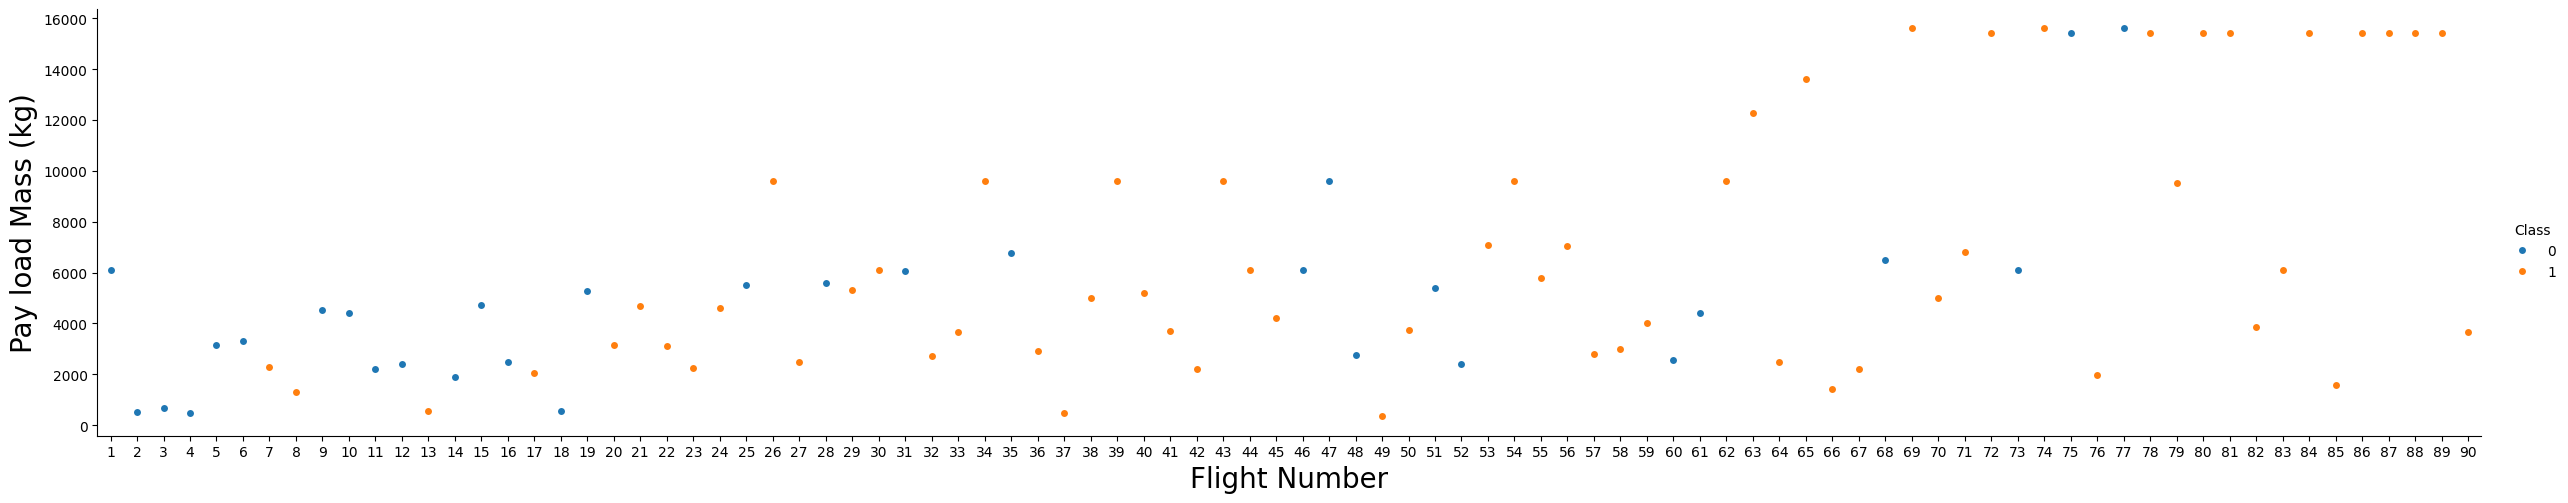

In [88]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

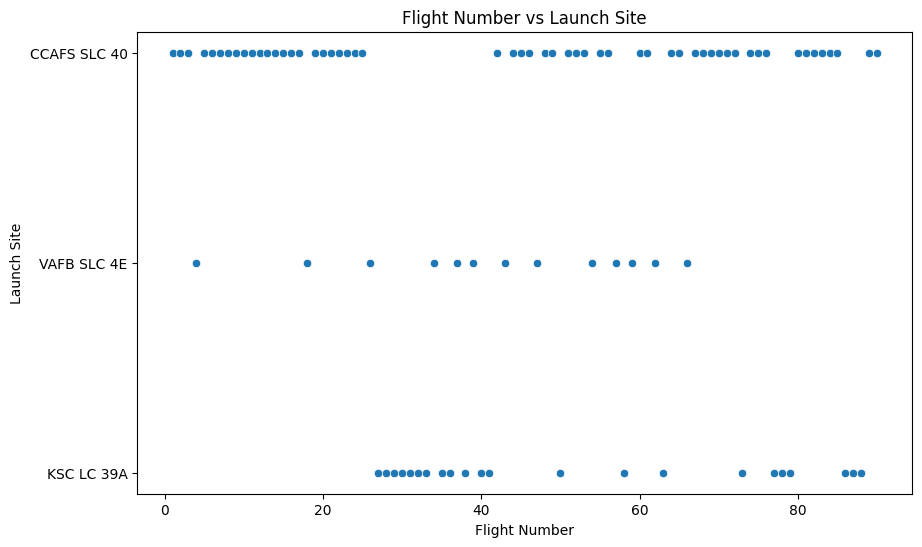

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='LaunchSite', data=df)
plt.title('Flight Number vs Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()


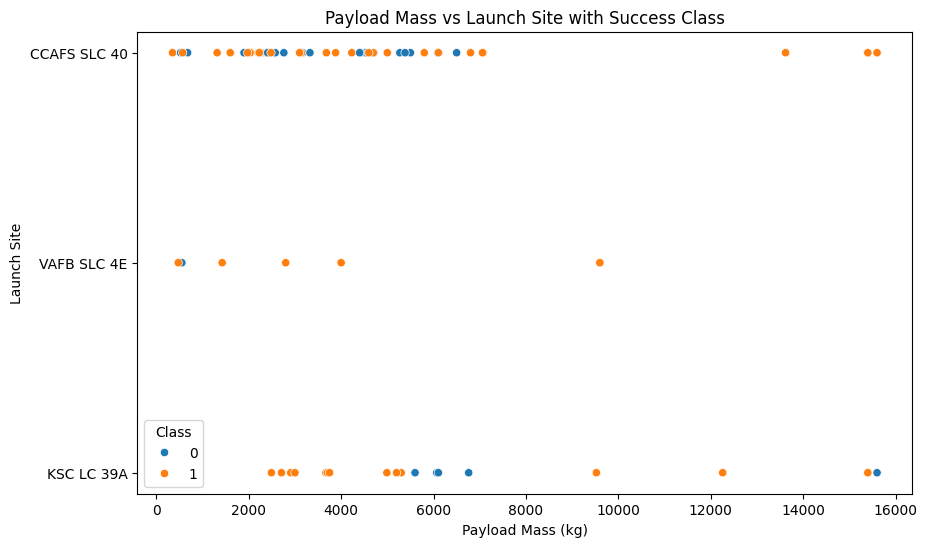

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Payload Mass ile Launch Site arasındaki ilişkiyi gösteren scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)
plt.title('Payload Mass vs Launch Site with Success Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()


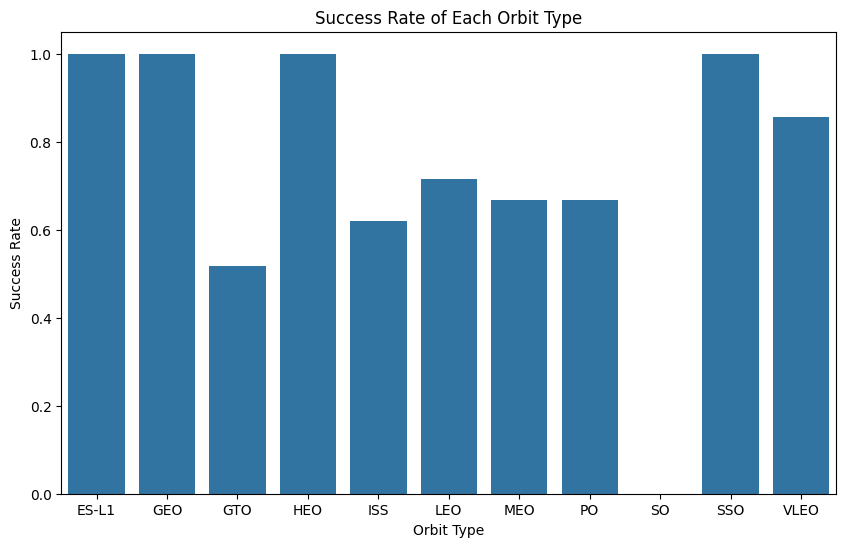

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Her yörünge türü için başarı oranını hesaplama
success_rate_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Bar chart oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=success_rate_orbit)
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()


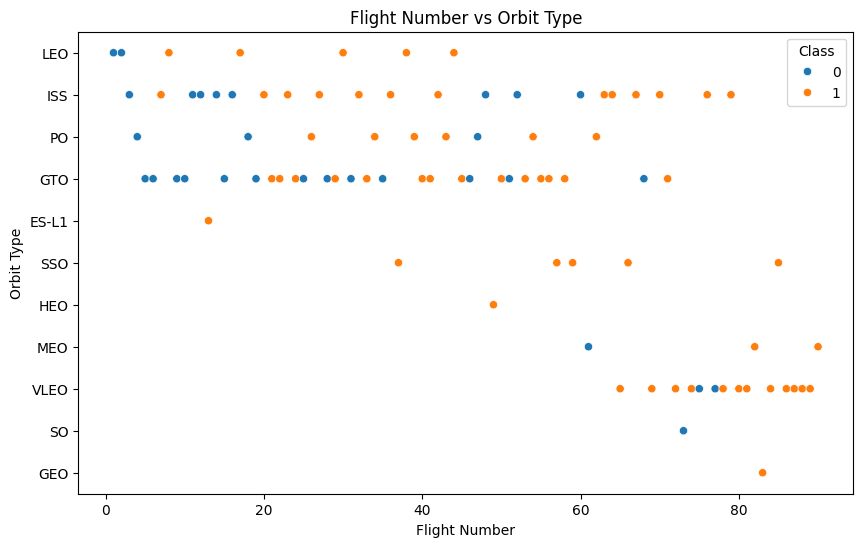

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flight Number ile Orbit Type arasındaki ilişkiyi gösteren scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.title('Flight Number vs Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()


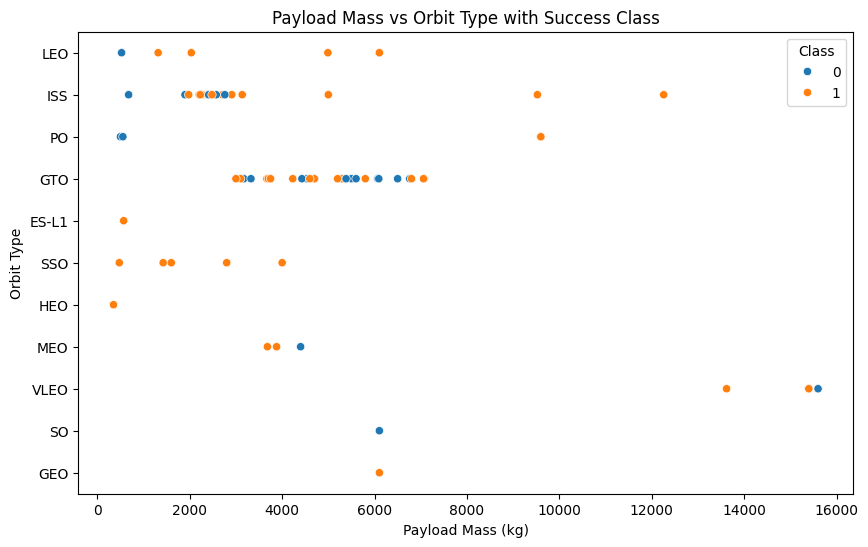

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Payload Mass ile Orbit Type arasındaki ilişkiyi gösteren scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)
plt.title('Payload Mass vs Orbit Type with Success Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.show()


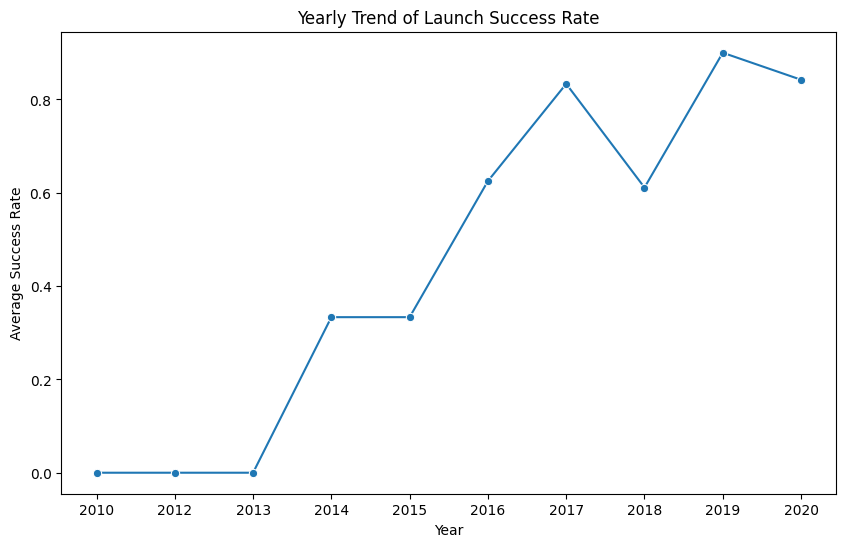

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tarih sütunundan yılı çıkaran fonksiyon
def Extract_year(df):
    year = []
    for i in df["Date"]:
        year.append(i.split("-")[0])
    df['Year'] = year
    return df

# Fonksiyonu uygulayın ve Year sütununu ekleyin
df = Extract_year(df)

# Yıllık başarı oranını hesaplayın
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Çizgi Grafiği Oluşturma
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=yearly_success, marker='o')
plt.title('Yearly Trend of Launch Success Rate')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.show()


In [95]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [97]:
import pandas as pd

# Mevcut features DataFrame'inize göz atın
print(features.head())

# Kategorik sütunlar için dummy değişkenler oluşturma
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Sonucu görüntüleme
print(features_one_hot.head())


   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004  
   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2           

In [98]:
# Tüm sütunları float64 tipine dönüştürme
features_one_hot = features_one_hot.astype('float64')

# Sonucu kontrol etme (isteğe bağlı)
print(features_one_hot.dtypes)

# DataFrame'i CSV dosyasına kaydetme
features_one_hot.to_csv('dataset_part_3.csv', index=False)


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


In [101]:
import folium
import pandas as pd

In [102]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [105]:
import requests
import pandas as pd
from io import BytesIO

# URL of the CSV file
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'

# Make an HTTP GET request to fetch the CSV file
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Convert the content to a BytesIO object and read it into a Pandas DataFrame
    spacex_csv_file = BytesIO(response.content)
    spacex_df = pd.read_csv(spacex_csv_file)
    # Display the first few rows of the DataFrame
    print(spacex_df.head())
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                                          Payload  \
0                            Dragon Spacecraft Qualification Unit   
1  Dragon demo flight C1, two CubeSats,  barrel of Brouère cheese   
2                                          Dragon demo flight C2+   
3                                                    SpaceX CRS-1   
4                                                    SpaceX CRS-2   

   Payload Mass (kg)      Orbit         Customer        Landing Outcome  \
0                0.0        LEO           SpaceX  Failure   (parachute)   
1 

In [106]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [107]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [132]:
import folium
from folium.plugins import MarkerCluster
from folium.features import DivIcon
import pandas as pd

# Veriyi indir ve oku
spacex_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')

# Gerekli sütunları seç
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]

# NASA Johnson Space Center'ın koordinatları ile haritayı başlat
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Her fırlatma alanı için daire ve işaretleyici ekle
for index, row in launch_sites_df.iterrows():
    # Koordinatlar
    coordinate = [row['Lat'], row['Long']]
    # Daire
    circle = folium.Circle(coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup(row['Launch Site']))
    # İşaretleyici
    marker = folium.map.Marker(
        coordinate,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % row['Launch Site'],
        )
    )
    # Haritaya ekle
    site_map.add_child(circle)
    site_map.add_child(marker)

# Haritayı göster
site_map

import folium
from folium.plugins import MarkerCluster
from folium.features import DivIcon
import pandas as pd

# Veriyi indir ve oku
spacex_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')

# Gerekli sütunları seç
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]

# Haritayı oluştur ve NASA Johnson Space Center'ın koordinatları ile başlat
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# MarkerCluster oluştur
marker_cluster = MarkerCluster().add_to(site_map)

# marker_color sütunu oluştur
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')

# Her fırlatma kaydı için Marker ekle
for index, record in spacex_df.iterrows():
    # Koordinatlar
    coordinate = [record['Lat'], record['Long']]
    # İşaretleyici
    marker = folium.Marker(
        location=coordinate,
        icon=folium.Icon(color='white', icon_color=record['marker_color']),
        popup=f"Launch Site: {record['Launch Site']}<br>Success: {record['class']}"
    )
    # MarkerCluster'a ekle
    marker_cluster.add_child(marker)

# Haritayı göster
site_map

#Task 3
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map



from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

import folium
from folium.features import DivIcon
from math import sin, cos, sqrt, atan2, radians

launch_site_lat = 28.56341
launch_site_lon = -80.57682

coastline_lat = 28.56229
coastline_lon = -80.5679

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

site_map = folium.Map(location=[launch_site_lat, launch_site_lon], zoom_start=15)

distance_marker = folium.Marker(
    [coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
    )
).add_to(site_map)

lines = folium.PolyLine(locations=[[launch_site_lat, launch_site_lon], [coastline_lat, coastline_lon]], weight=1)
site_map.add_child(lines)

site_map




In [136]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
response = requests.get(url)

# İndirilen dosyayı kaydet
with open('spacex_launch_dash.csv', 'wb') as file:
    file.write(response.content)

print("Dosya başarıyla indirildi.")


Dosya başarıyla indirildi.


In [137]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"
response = requests.get(url)

# İndirilen dosyayı kaydet
with open('spacex_dash_app.py', 'wb') as file:
    file.write(response.content)

print("Dosya başarıyla indirildi.")


Dosya başarıyla indirildi.


In [154]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Dash uygulamasını başlatma
app = dash.Dash(__name__)

# SpaceX veri setini yükleme
spacex_df = pd.read_csv("spacex_launch_dash.csv")

# Uygulama düzeni (Layout)
app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    ),
    dcc.Graph(id='success-pie-chart')
])

# Geri çağırma fonksiyonu (Callback) 
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(
            filtered_df, 
            values='class', 
            names='Launch Site', 
            title='Total Success Launches by Site'
        )
    else:
        site_df = filtered_df[filtered_df['Launch Site'] == entered_site]
        site_counts = site_df['class'].value_counts().reset_index()
        site_counts.columns = ['class', 'count']
        fig = px.pie(
            site_counts, 
            values='count', 
            names='class', 
            title=f"Total Success Launches for site {entered_site}"
        )
    return fig

# Sunucuyu çalıştırma
if __name__ == '__main__':
    app.run_server(debug=True)



app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    ),
    dcc.Graph(id='success-pie-chart'),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=1000,
        marks={0: '0', 1000: '1000', 2000: '2000', 3000: '3000', 
               4000: '4000', 5000: '5000', 6000: '6000', 7000: '7000',
               8000: '8000', 9000: '9000', 10000: '10000'},
        value=[min(spacex_df['Payload Mass (kg)']), max(spacex_df['Payload Mass (kg)'])]
    )
])











In [155]:
app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    ),
    dcc.Graph(id='success-pie-chart'),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=1000,
        marks={0: '0', 1000: '1000', 2000: '2000', 3000: '3000', 
               4000: '4000', 5000: '5000', 6000: '6000', 7000: '7000',
               8000: '8000', 9000: '9000', 10000: '10000'},
        value=[min(spacex_df['Payload Mass (kg)']), max(spacex_df['Payload Mass (kg)'])]
    ),
    dcc.Graph(id='success-payload-scatter-chart')
])

In [156]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Dash uygulamasını başlatma
app = dash.Dash(__name__)

# SpaceX veri setini yükleme
spacex_df = pd.read_csv("spacex_launch_dash.csv")

# Uygulama düzeni (Layout)
app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    ),
    dcc.Graph(id='success-pie-chart'),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=1000,
        marks={0: '0', 1000: '1000', 2000: '2000', 3000: '3000', 
               4000: '4000', 5000: '5000', 6000: '6000', 7000: '7000',
               8000: '8000', 9000: '9000', 10000: '10000'},
        value=[min(spacex_df['Payload Mass (kg)']), max(spacex_df['Payload Mass (kg)'])]
    ),
    dcc.Graph(id='success-payload-scatter-chart')
])

# Geri çağırma fonksiyonu (Callback) - Dağılım Grafiği için
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
     Input(component_id='payload-slider', component_property='value')]
)
def update_scatter_chart(selected_site, selected_payload):
    # Seçilen yük aralığına göre veri çerçevesini filtreleyin
    filtered_df = spacex_df[
        (spacex_df['Payload Mass (kg)'] >= selected_payload[0]) & 
        (spacex_df['Payload Mass (kg)'] <= selected_payload[1])
    ]
    
    # Eğer tüm siteler seçildiyse
    if selected_site == 'ALL':
        fig = px.scatter(
            filtered_df, 
            x='Payload Mass (kg)', 
            y='class', 
            color='Booster Version Category',
            title='Correlation between Payload and Success for all Sites'
        )
    else:
        # Seçilen siteye göre veri çerçevesini filtreleyin
        filtered_df = filtered_df[filtered_df['Launch Site'] == selected_site]
        fig = px.scatter(
            filtered_df, 
            x='Payload Mass (kg)', 
            y='class', 
            color='Booster Version Category',
            title=f'Correlation between Payload and Success for site {selected_site}'
        )
    
    return fig

# Sunucuyu çalıştırma
if __name__ == '__main__':
    app.run_server(debug=True)


In [159]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [160]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [162]:
import requests
import pandas as pd
import io

# URL'den CSV dosyasını indirme
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)

# BytesIO kullanarak dosyayı bir pandas DataFrame'e okuma
data = pd.read_csv(io.BytesIO(response.content))

# İlk birkaç satırı görüntüleme
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [163]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [166]:
import requests
import pandas as pd
import io

# URL'den CSV dosyasını indirme
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL2)

# BytesIO kullanarak dosyayı bir pandas DataFrame'e okuma
text2 = io.BytesIO(response.content)
X = pd.read_csv(text2)

# İlk birkaç satırı görüntüleme
print(X.head())


   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  Orbit_MEO  Orbit_PO  \
0        0.0        0.0        0.0        0.0        1.0        0.0       0.0   
1        0.0        0.0        0.0        0.0        1.0        0.0       0.0   
2        0.0        0.0        0.0        1.0        0.0        0.0       0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0       1.0   
4        0.0        1.0        0.0        0.0        0.0        0.0       0.0   

   Orbit_SO  Orbit_SSO  Orbit_VLEO  LaunchSite_CCAFS SLC 40  \
0    

In [167]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.

In [168]:
Y = data['Class'].to_numpy()


In [169]:
from sklearn import preprocessing

# StandardScaler'ı tanımlayın
transform = preprocessing.StandardScaler()

# X verilerini standartlaştırın ve yeniden X'e atayın
X = transform.fit_transform(X)


In [170]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test olarak bölün
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Model ve parametreler
model = SVC()
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

# GridSearchCV kullanarak en iyi modeli ve hiperparametreleri bulun
clf = GridSearchCV(model, parameters)
clf.fit(X_train, Y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [172]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test olarak bölün
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Lojistik regresyon nesnesini oluşturma
lr = LogisticRegression()

# Hiperparametreleri içeren sözlük
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# GridSearchCV nesnesini oluşturma, cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# GridSearchCV nesnesini veriler üzerinde eğitme
logreg_cv.fit(X_train, Y_train)

# En iyi parametreleri ve doğruluğu ekrana yazdırma
print("Tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("Accuracy :", logreg_cv.best_score_)


Tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8464285714285713


Accuracy on test data: 0.8333333333333334


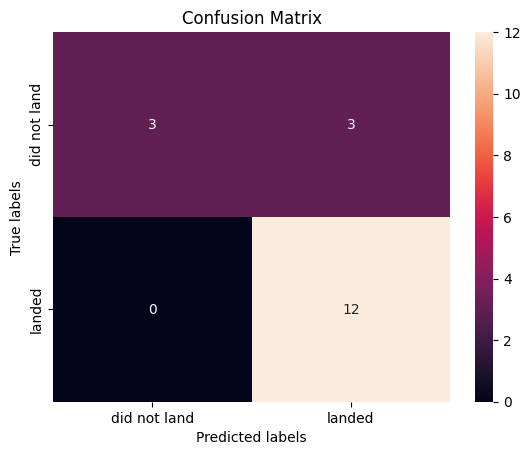

In [174]:
# Test verileri üzerinde doğruluğu hesaplama
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

# Karışıklık matrisi için tahminler yapma
yhat = logreg_cv.predict(X_test)

# Karışıklık matrisini oluşturma ve görselleştirme
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

# Karışıklık matrisini plot etme
plot_confusion_matrix(Y_test, yhat)


In [175]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM nesnesini oluşturma
svm = SVC()

# Hiperparametreleri içeren sözlük
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

# GridSearchCV nesnesini oluşturma, cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# GridSearchCV nesnesini veriler üzerinde eğitme
svm_cv.fit(X_train, Y_train)

# En iyi parametreleri ve doğruluğu ekrana yazdırma
print("Tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("Accuracy :", svm_cv.best_score_)


Tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy : 0.8482142857142856


Accuracy on test data: 0.8333333333333334


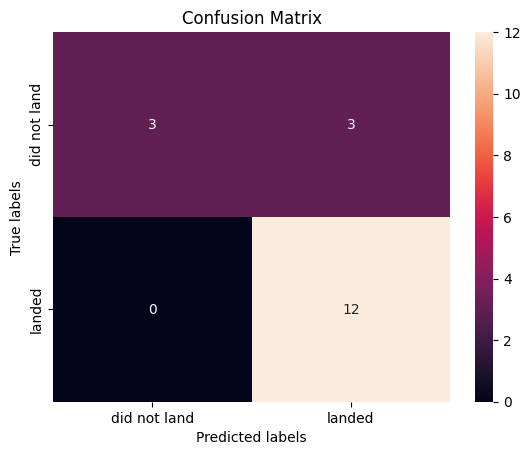

In [176]:
# Test verileri üzerinde doğruluğu hesaplama
accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

# Karışıklık matrisi için tahminler yapma
yhat = svm_cv.predict(X_test)

# Karışıklık matrisini oluşturma ve görselleştirme
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

# Karışıklık matrisini plot etme
plot_confusion_matrix(Y_test, yhat)


In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Karar ağacı sınıflandırıcı nesnesini oluşturma
tree = DecisionTreeClassifier()

# Hiperparametreleri içeren sözlük
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# GridSearchCV nesnesini oluşturma, cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# GridSearchCV nesnesini veriler üzerinde eğitme
tree_cv.fit(X_train, Y_train)

# En iyi parametreleri ve doğruluğu ekrana yazdırma
print("Tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("Accuracy :", tree_cv.best_score_)


Tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy : 0.875


c:\Users\Aydan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Aydan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Aydan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Aydan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Accuracy on test data: 0.9444444444444444


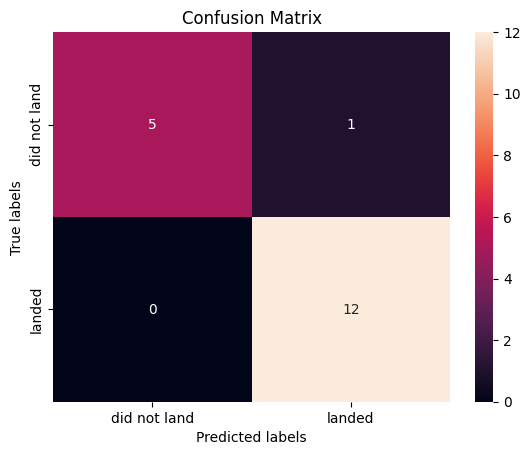

In [178]:
# Test verileri üzerinde doğruluğu hesaplama
accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

# Karışıklık matrisi için tahminler yapma
yhat = tree_cv.predict(X_test)

# Karışıklık matrisini oluşturma ve görselleştirme
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

# Karışıklık matrisini plot etme
plot_confusion_matrix(Y_test, yhat)


In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN nesnesini oluşturma
KNN = KNeighborsClassifier()

# Hiperparametreleri içeren sözlük
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# GridSearchCV nesnesini oluşturma, cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# GridSearchCV nesnesini veriler üzerinde eğitme
knn_cv.fit(X_train, Y_train)

# En iyi parametreleri ve doğruluğu ekrana yazdırma
print("Tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("Accuracy :", knn_cv.best_score_)


Tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.8482142857142858


Accuracy on test data: 0.8333333333333334


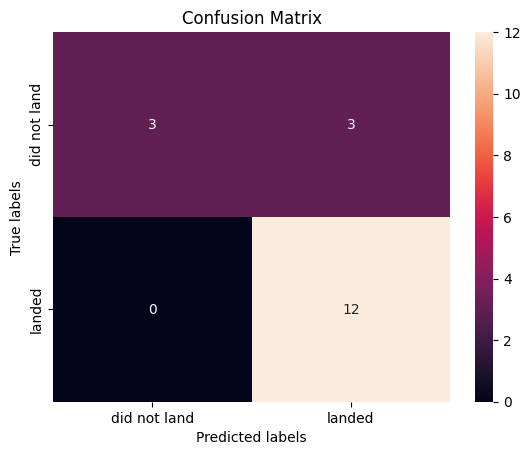

In [180]:
# Test verileri üzerinde doğruluğu hesaplama
accuracy = knn_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

# Karışıklık matrisi için tahminler yapma
yhat = knn_cv.predict(X_test)

# Karışıklık matrisini oluşturma ve görselleştirme
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

# Karışıklık matrisini plot etme
plot_confusion_matrix(Y_test, yhat)


In [181]:
# Logistic Regression doğruluğu
logreg_accuracy = logreg_cv.score(X_test, Y_test)

# SVM doğruluğu
svm_accuracy = svm_cv.score(X_test, Y_test)

# Decision Tree doğruluğu
tree_accuracy = tree_cv.score(X_test, Y_test)

# KNN doğruluğu
knn_accuracy = knn_cv.score(X_test, Y_test)

# Doğrulukları ekrana yazdırma
print("Logistic Regression Accuracy:", logreg_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)
print("KNN Accuracy:", knn_accuracy)


Logistic Regression Accuracy: 0.8333333333333334
SVM Accuracy: 0.8333333333333334
Decision Tree Accuracy: 0.9444444444444444
KNN Accuracy: 0.8333333333333334


In [182]:
# En yüksek doğruluğa sahip modeli bulma
best_model = max([
    ('Logistic Regression', logreg_accuracy),
    ('SVM', svm_accuracy),
    ('Decision Tree', tree_accuracy),
    ('KNN', knn_accuracy)
], key=lambda x: x[1])

# En iyi performansı gösteren modeli ve doğruluğunu ekrana yazdırma
print(f"The best performing method is: {best_model[0]} with an accuracy of {best_model[1]}")


The best performing method is: Decision Tree with an accuracy of 0.9444444444444444


In [183]:
# Test setindeki kayıt sayısını bulma
num_records = X_test.shape[0]
print("Number of records in the test sample:", num_records)


Number of records in the test sample: 18


In [184]:
# SVM modelinde en iyi çekirdek (kernel) hangisi?
best_kernel = svm_cv.best_params_['kernel']
print("Best kernel for SVM:", best_kernel)


Best kernel for SVM: sigmoid


In [185]:
# Karar Ağacı modelinin test verisi üzerindeki doğruluğu
tree_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Accuracy on test data:", tree_accuracy)


Decision Tree Accuracy on test data: 0.9444444444444444
